In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt

In [2]:
chemicas = ['C','Si','Mn','Cr','Ni','Mo','Ti','Cu','Al','V','Nb','Co','W','Fe','Zr','Be','Sb','Mg','Zn','S','P','Pb','Sn','Cd','Ca','Bi','Ag','Ga','Sc','Au','Tl','Nd','La','Y','Gd','Ge','Ta','Ce','B','Hf']

In [3]:
data = pd.read_csv("../datasets/final_dataset.csv")

In [4]:
X = data.drop(columns=(chemicas+['Sample', 'Device', 'Folder', 'Temp'])).values
y = data[chemicas].values

scaler_X = StandardScaler()
scaler_y = MinMaxScaler() #feature_range=(0.01, 0.99))
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# np.savetxt("/tmp/check.txt", y, fmt='%.6f')
# print(y_scaled)

In [94]:
num_chemicas = len(chemicas)

inputs = Input(shape=(X.shape[1],))
x = Dense(2048, activation='sigmoid')(inputs)
# x = Dropout(0.1)(x)
outputs = Dense(num_chemicas, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [95]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=50,
          batch_size=32)

Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0244 - mae: 0.0530 - val_loss: 0.0075 - val_mae: 0.0194
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0050 - mae: 0.0164 - val_loss: 0.0033 - val_mae: 0.0114
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - mae: 0.0108 - val_loss: 0.0032 - val_mae: 0.0102
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032 - mae: 0.0105 - val_loss: 0.0031 - val_mae: 0.0103
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - mae: 0.0103 - val_loss: 0.0030 - val_mae: 0.0100
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030 - mae: 0.0100 - val_loss: 0.0028 - val_mae: 0.0104
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0025 - mae: 0.0099 - val_loss: 0.0025 - val_mae: 0.0103
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 - mae: 0.0098 - val_loss: 0.0019 - val_mae: 0.0095
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

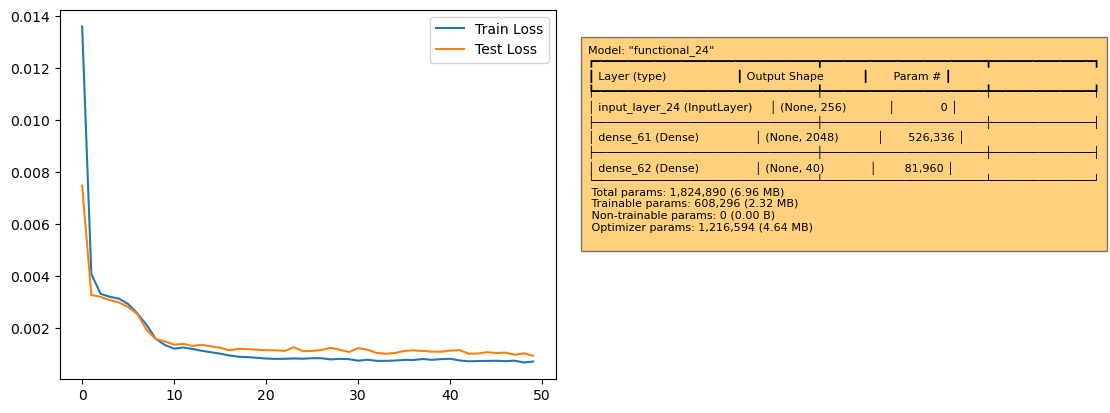

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()

model_summary = []
model.summary(print_fn=lambda x: model_summary.append(x))
model_summary_str = '\n'.join(model_summary)

# Добавление структуры модели в качестве подписи к графику справа
plt.figtext(0.95, 0.60, model_summary_str, ha="left", va="center", fontsize=8, bbox={"facecolor":"orange", "alpha":0.5, "pad":5}) # Меняйте параметры `ha`, `va`, `fontsize`, `bbox` для желаемого расположения и стиля

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


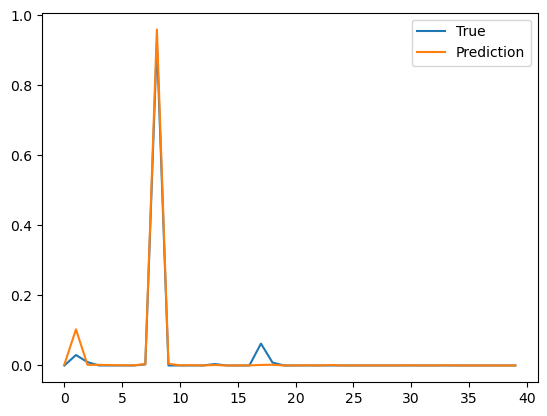

In [16]:
arr_num = 100

#--------------------------------------------------------

question = X_scaled[arr_num].reshape((1,256))
y_true = y_scaled[arr_num]
y_pred = model.predict(question)[0]

plt.plot(y_true, label="True")
plt.plot(y_pred, label="Prediction")
plt.legend()
plt.show()

In [20]:
print(np.around(y_pred,2))
print(np.around(y_true,2))

[0.   0.1  0.   0.   0.   0.   0.   0.   0.96 0.01 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
[0.   0.03 0.01 0.   0.   0.   0.   0.   0.92 0.   0.   0.   0.   0.
 0.   0.   0.   0.06 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
